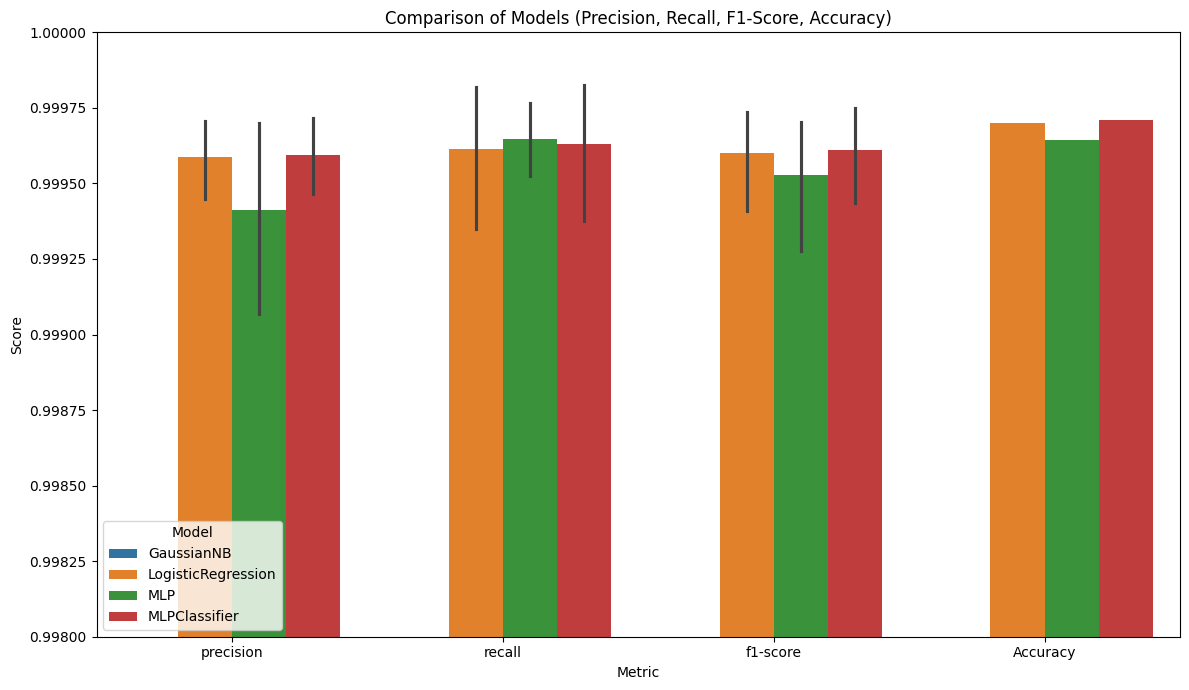

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_matrix(filepath):
    matrix = pd.read_csv(filepath, index_col=0)
    matrix = matrix.loc[:, ~matrix.columns.str.contains('^Unnamed')]
    return matrix

gaussian = pd.read_csv('classification_GaussianNB.csv')
logreg = pd.read_csv('classification_LogReg.csv')
mlp = pd.read_csv('classification_MLP.csv')
mlp_classifier = pd.read_csv('classification_MLPclassifier.csv')

gaussian['Model'] = 'GaussianNB'
logreg['Model'] = 'LogisticRegression'
mlp['Model'] = 'MLP'
mlp_classifier['Model'] = 'MLPClassifier'

classification_all = pd.concat([gaussian, logreg, mlp, mlp_classifier])

classification_melt = classification_all.melt(
    id_vars=['Model'],
    value_vars=['precision', 'recall', 'f1-score'],
    var_name='Metric',
    value_name='Score'
)

matrix_gaussian = load_matrix('matrix_GaussianNB.csv')
matrix_logreg = load_matrix('matrix_LogReg.csv')
matrix_mlp = load_matrix('matrix_MLP.csv')
matrix_mlp_classifier = load_matrix('matrix_MLPclassifier.csv')

matrix_gaussian = matrix_gaussian.loc[:, ~matrix_gaussian.columns.str.contains('^Unnamed')]
matrix_logreg = matrix_logreg.loc[:, ~matrix_logreg.columns.str.contains('^Unnamed')]
matrix_mlp = matrix_mlp.loc[:, ~matrix_mlp.columns.str.contains('^Unnamed')]
matrix_mlp_classifier = matrix_mlp_classifier.loc[:, ~matrix_mlp_classifier.columns.str.contains('^Unnamed')]

def calculate_accuracy(matrix):
    correct_predictions = sum([matrix.iloc[i, i] for i in range(len(matrix))])
    total_predictions = matrix.values.sum()
    return correct_predictions / total_predictions

acc_gaussian = calculate_accuracy(matrix_gaussian)
acc_logreg = calculate_accuracy(matrix_logreg)
acc_mlp = calculate_accuracy(matrix_mlp)
acc_mlp_classifier = calculate_accuracy(matrix_mlp_classifier)

accuracy_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy', 'Accuracy'],
    'Score': [acc_gaussian, acc_logreg, acc_mlp, acc_mlp_classifier],
    'Model': ['GaussianNB', 'LogisticRegression', 'MLP', 'MLPClassifier']
})

final_df = pd.concat([classification_melt, accuracy_df])

plt.figure(figsize=(12, 7))
sns.barplot(data=final_df, x='Metric', y='Score', hue='Model')
plt.title('Comparison of Models (Precision, Recall, F1-Score, Accuracy)')
plt.ylim(.998, 1)
plt.ylabel('Score')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


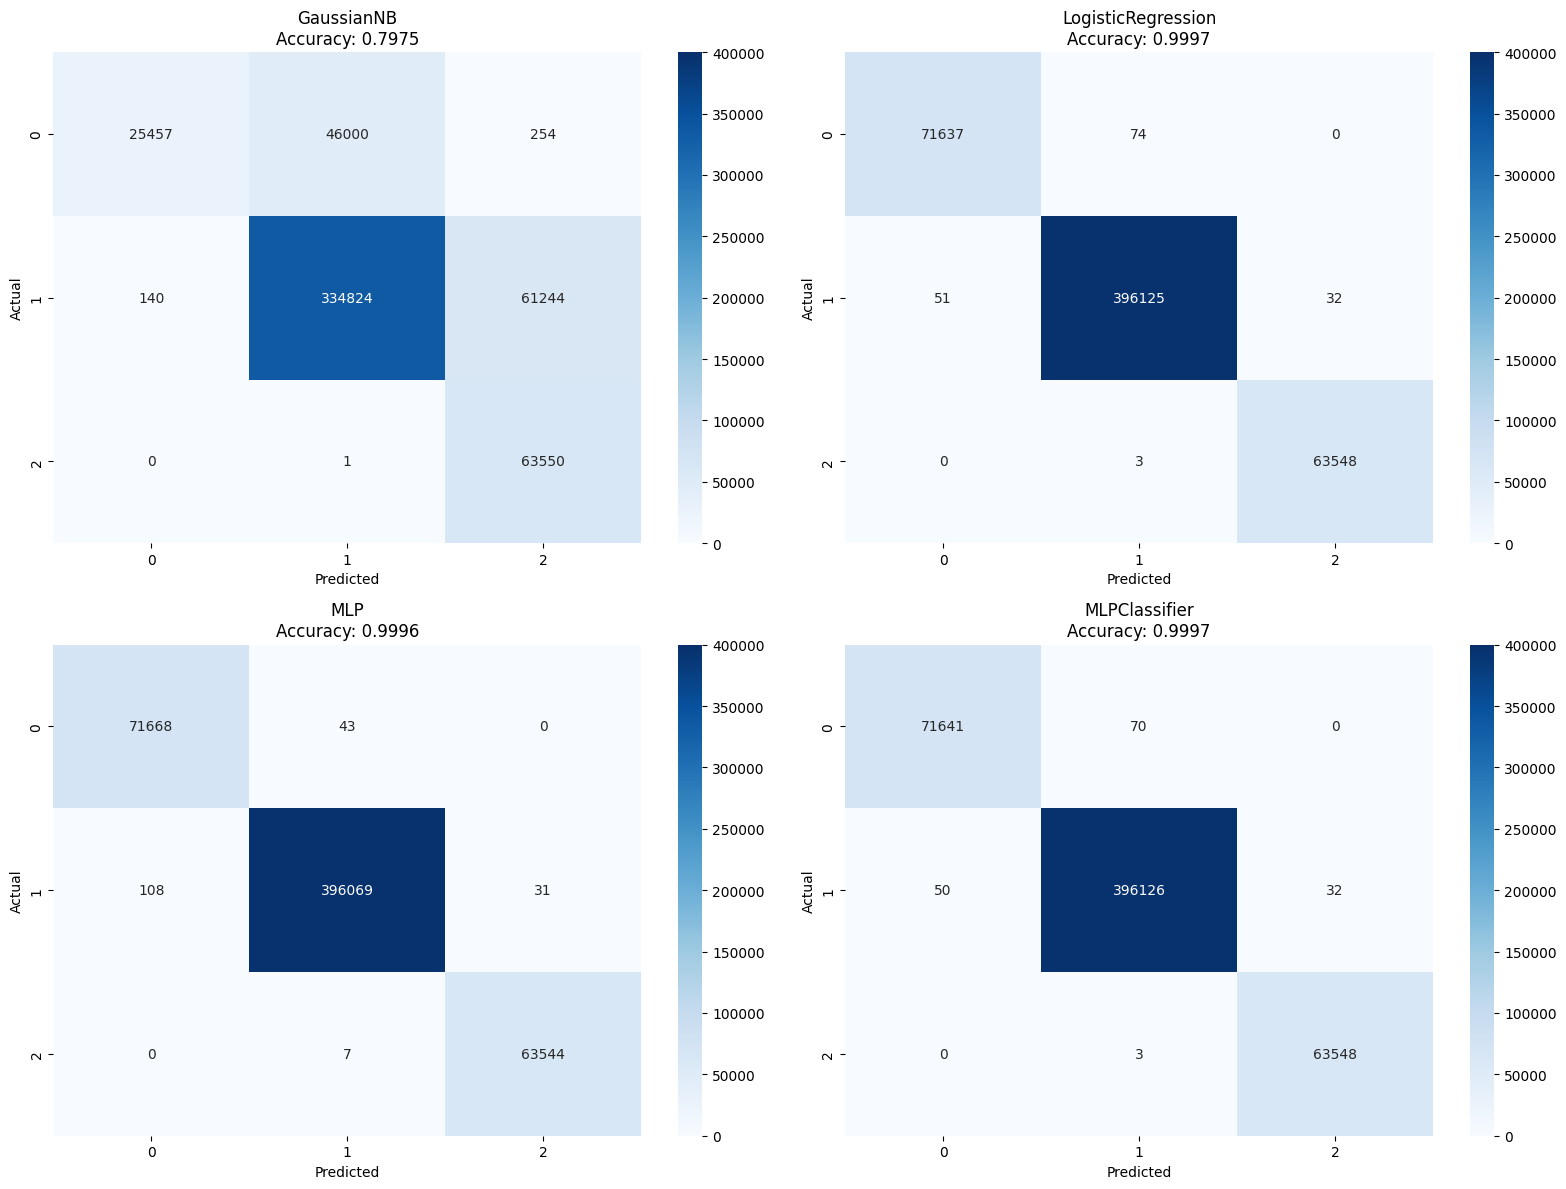

In [46]:
acc_gaussian = calculate_accuracy(matrix_gaussian)
acc_logreg = calculate_accuracy(matrix_logreg)
acc_mlp = calculate_accuracy(matrix_mlp)
acc_mlp_classifier = calculate_accuracy(matrix_mlp_classifier)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(matrix_gaussian, annot=True, fmt='g', cmap='Blues', vmax=400000, ax=axes[0,0])
axes[0,0].set_title(f'GaussianNB\nAccuracy: {acc_gaussian:.4f}')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

sns.heatmap(matrix_logreg, annot=True, fmt='g', cmap='Blues', vmax=400000, ax=axes[0,1])
axes[0,1].set_title(f'LogisticRegression\nAccuracy: {acc_logreg:.4f}')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

sns.heatmap(matrix_mlp, annot=True, fmt='g', cmap='Blues', vmax=400000, ax=axes[1,0])
axes[1,0].set_title(f'MLP\nAccuracy: {acc_mlp:.4f}')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

sns.heatmap(matrix_mlp_classifier, annot=True, fmt='g', cmap='Blues', vmax=400000, ax=axes[1,1])
axes[1,1].set_title(f'MLPClassifier\nAccuracy: {acc_mlp_classifier:.4f}')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [47]:
summary_table = pd.DataFrame({
    'Model': ['GaussianNB', 'LogisticRegression', 'MLP', 'MLPClassifier'],
    'Precision': [
        gaussian['precision'].values[0],
        logreg['precision'].values[0],
        mlp['precision'].values[0],
        mlp_classifier['precision'].values[0]
    ],
    'Recall': [
        gaussian['recall'].values[0],
        logreg['recall'].values[0],
        mlp['recall'].values[0],
        mlp_classifier['recall'].values[0]
    ],
    'F1-Score': [
        gaussian['f1-score'].values[0],
        logreg['f1-score'].values[0],
        mlp['f1-score'].values[0],
        mlp_classifier['f1-score'].values[0]
    ],
    'Accuracy': [
        calculate_accuracy(matrix_gaussian),
        calculate_accuracy(matrix_logreg),
        calculate_accuracy(matrix_mlp),
        calculate_accuracy(matrix_mlp_classifier)
    ]
})

print(summary_table.round(4))

                Model  Precision  Recall  F1-Score  Accuracy
0          GaussianNB     0.9945  0.3550    0.5232    0.7975
1  LogisticRegression     0.9993  0.9990    0.9991    0.9997
2                 MLP     0.9985  0.9994    0.9989    0.9996
3       MLPClassifier     0.9993  0.9990    0.9992    0.9997


In [48]:
def classification_report_from_matrix(matrix):
    report = {}
    n_classes = matrix.shape[0]
    for i in range(n_classes):
        TP = matrix.iloc[i, i]
        FP = matrix.iloc[:, i].sum() - TP
        FN = matrix.iloc[i, :].sum() - TP

        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        report[f'Class {i}'] = {
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1-Score': round(f1, 4)
        }
    return pd.DataFrame(report).T

report_gaussian = classification_report_from_matrix(matrix_gaussian)
report_logreg = classification_report_from_matrix(matrix_logreg)
report_mlp = classification_report_from_matrix(matrix_mlp)
report_mlp_classifier = classification_report_from_matrix(matrix_mlp_classifier)

print("GaussianNB Report:\n", report_gaussian)
print("\nLogisticRegression Report:\n", report_logreg)
print("\nMLP Report:\n", report_mlp)
print("\nMLPClassifier Report:\n", report_mlp_classifier)

GaussianNB Report:
          Precision  Recall  F1-Score
Class 0     0.9945  0.3550    0.5232
Class 1     0.8792  0.8451    0.8618
Class 2     0.5082  1.0000    0.6739

LogisticRegression Report:
          Precision  Recall  F1-Score
Class 0     0.9993  0.9990    0.9991
Class 1     0.9998  0.9998    0.9998
Class 2     0.9995  1.0000    0.9997

MLP Report:
          Precision  Recall  F1-Score
Class 0     0.9985  0.9994    0.9989
Class 1     0.9999  0.9996    0.9998
Class 2     0.9995  0.9999    0.9997

MLPClassifier Report:
          Precision  Recall  F1-Score
Class 0     0.9993  0.9990    0.9992
Class 1     0.9998  0.9998    0.9998
Class 2     0.9995  1.0000    0.9997


Perfect Confusion Matrix:
       0       1      2
0  71711       0      0
1      0  396208      0
2      0       0  63551


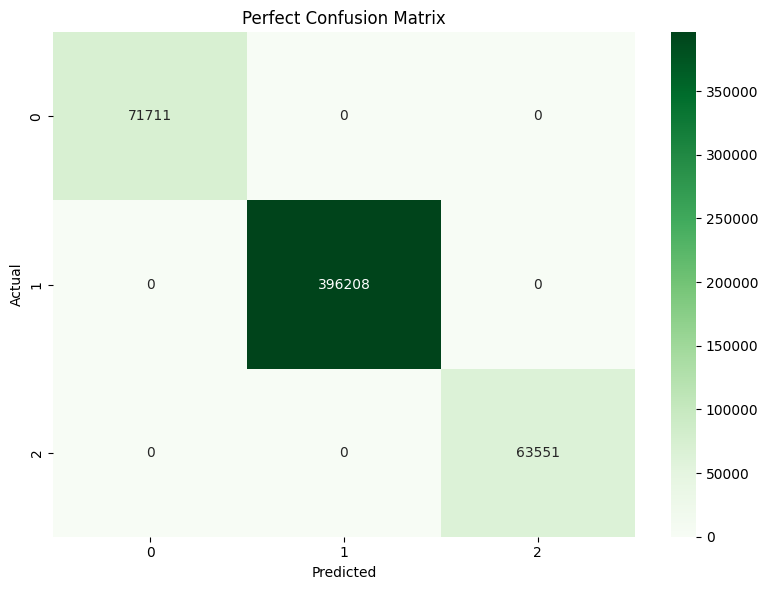

In [35]:
matrix = pd.read_csv('matrix_GaussianNB.csv', index_col=0)

matrix = matrix.loc[:, ~matrix.columns.str.contains('^Unnamed')]

actual_class_counts = matrix.sum(axis=1)

perfect_confusion = np.zeros((len(actual_class_counts), len(actual_class_counts)), dtype=int)
np.fill_diagonal(perfect_confusion, actual_class_counts.values)

perfect_confusion_df = pd.DataFrame(perfect_confusion, index=actual_class_counts.index, columns=actual_class_counts.index)

print("Perfect Confusion Matrix:")
print(perfect_confusion_df)

plt.figure(figsize=(8, 6))
sns.heatmap(perfect_confusion_df, annot=True, fmt='g', cmap='Greens')

plt.title('Perfect Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

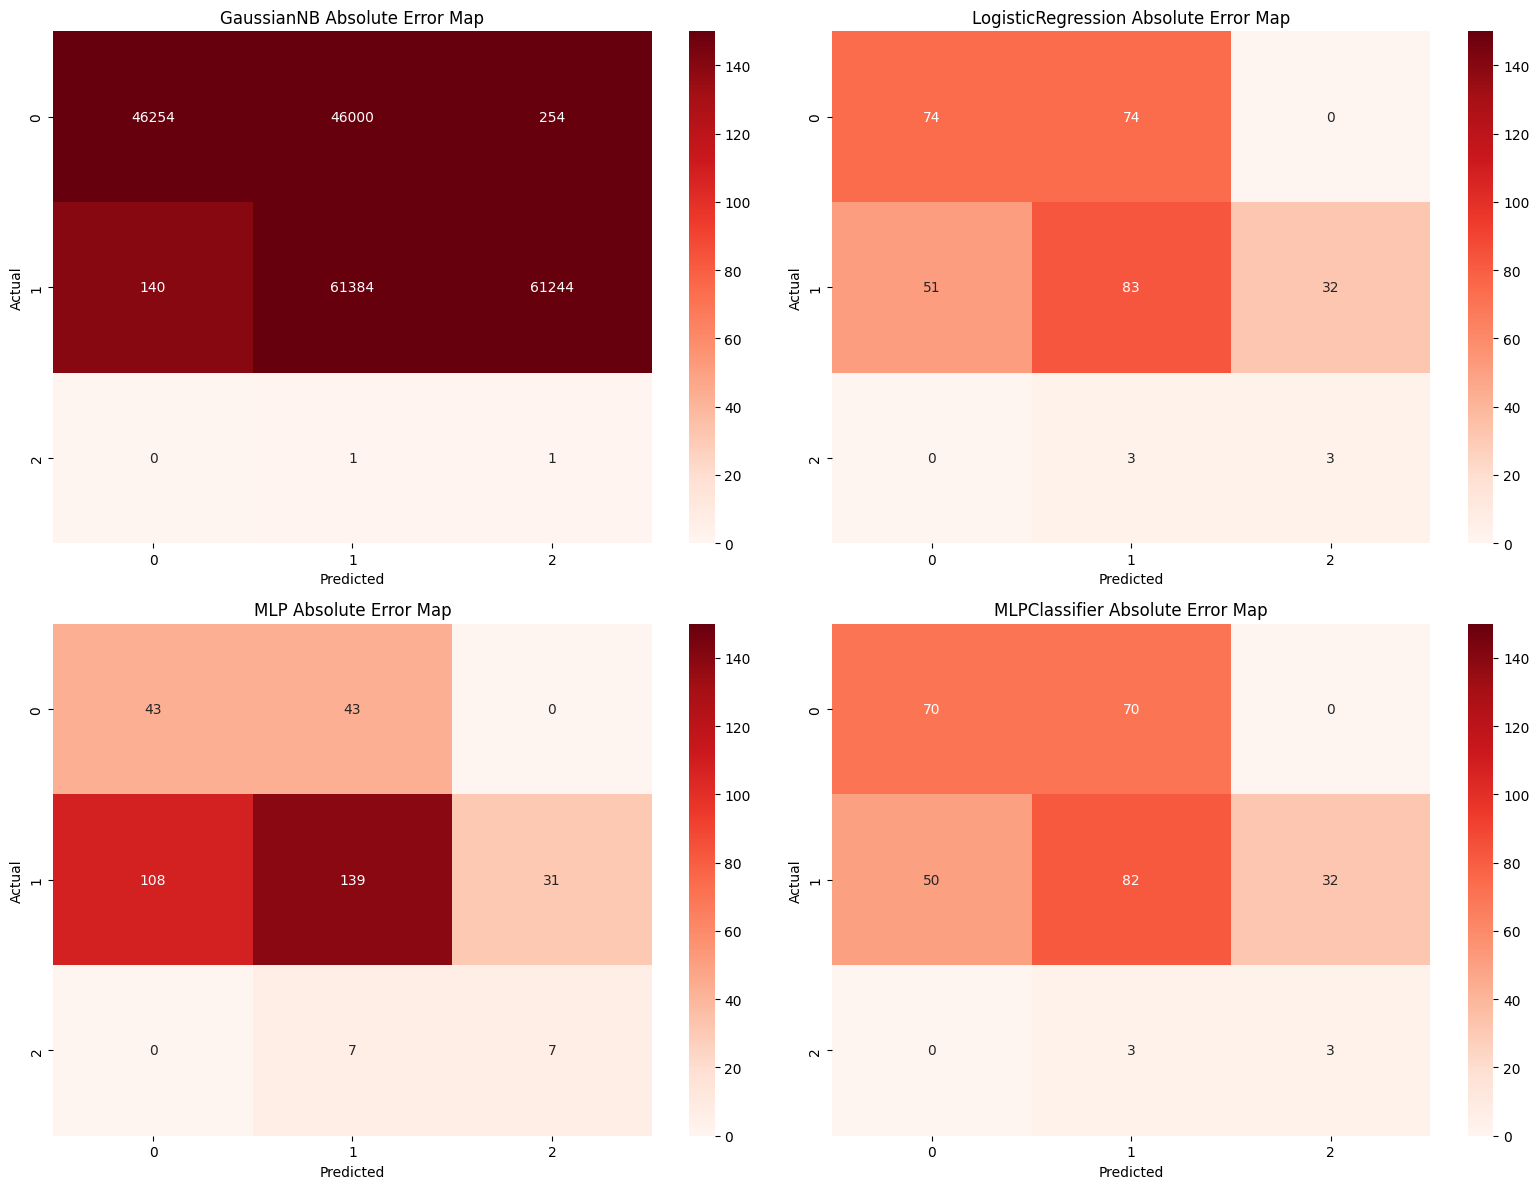

In [44]:
abs_residual_gaussian = np.abs(matrix_gaussian.values - perfect_confusion_df.values)
abs_residual_logreg = np.abs(matrix_logreg.values - perfect_confusion_df.values)
abs_residual_mlp = np.abs(matrix_mlp.values - perfect_confusion_df.values)
abs_residual_mlp_classifier = np.abs(matrix_mlp_classifier.values - perfect_confusion_df.values)

abs_residual_gaussian = pd.DataFrame(abs_residual_gaussian, index=matrix_gaussian.index, columns=matrix_gaussian.columns)
abs_residual_logreg = pd.DataFrame(abs_residual_logreg, index=matrix_logreg.index, columns=matrix_logreg.columns)
abs_residual_mlp = pd.DataFrame(abs_residual_mlp, index=matrix_mlp.index, columns=matrix_mlp.columns)
abs_residual_mlp_classifier = pd.DataFrame(abs_residual_mlp_classifier, index=matrix_mlp_classifier.index, columns=matrix_mlp_classifier.columns)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(abs_residual_gaussian, annot=True, fmt='g', cmap='Reds', vmax=150, ax=axes[0,0])
axes[0,0].set_title('GaussianNB Absolute Error Map')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

sns.heatmap(abs_residual_logreg, annot=True, fmt='g', cmap='Reds', vmax=150, ax=axes[0,1])
axes[0,1].set_title('LogisticRegression Absolute Error Map')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

sns.heatmap(abs_residual_mlp, annot=True, fmt='g', cmap='Reds', vmax=150, ax=axes[1,0])
axes[1,0].set_title('MLP Absolute Error Map')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

sns.heatmap(abs_residual_mlp_classifier, annot=True, fmt='g', cmap='Reds', vmax=150, ax=axes[1,1])
axes[1,1].set_title('MLPClassifier Absolute Error Map')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.show()